<a href="https://colab.research.google.com/github/Arbalest313/Auto.js/blob/master/01_Refined_Insane_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=a0ed2124e4f1c7f1d400ce715ea14d573b22380993220dc28e9302c09884b002
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [21]:
pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173913 sha256=579462edd565a7e150492b75accdf0f72f43a2e74d74dfbf3b6053469045f320
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [25]:
pip install seaborn

### 1 - Import test data

In [27]:
import pandas as pd
import pandas_ta as ta

df = pd.read_csv("/content/sample_data/SHFE.rb2501_04_to_08_60s.csv")
# df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['eob']=pd.to_datetime(df['eob'])
df = df.rename(columns={'close': 'Close', 'open': 'Open','high':'High','low':'Low','volume':'Volume'})

df=df[df.High!=df.Low]
# df.reset_index(inplace=True, drop=True)
df.set_index(pd.DatetimeIndex([i.replace(tzinfo=None) for i in df["eob"]]), inplace=True)

In [28]:
# Calculate Bollinger Bands and RSI using pandas_ta
df.ta.bbands(append=True, length=30, std=2)
df.ta.rsi(append=True, length=14)
df["atr"] = ta.atr(low = df.Low, close = df.Close, high = df.High, length=14)

# Rename columns for clarity if necessary
df.rename(columns={
    'BBL_30_2.0': 'bbl', 'BBM_30_2.0': 'bbm', 'BBU_30_2.0': 'bbh', 'RSI_14': 'rsi'
}, inplace=True)

# Calculate Bollinger Bands Width
df['bb_width'] = (df['bbh'] - df['bbl']) / df['bbm']
df

,Unnamed: 0,symbol,frequency,Open,High,Low,Close,Volume,amount,pre_close,...,bob,eob,bbl,bbm,bbh,BBB_30_2.0,BBP_30_2.0,rsi,atr,bb_width
2024-04-01 09:01:00,0,SHFE.rb2501,60s,3429.0,3429.0,3420.0,3422.0,783,26826620.0,0.0,...,2024-04-01 09:00:00+08:00,2024-04-01 09:01:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01 09:02:00,1,SHFE.rb2501,60s,3422.0,3428.0,3420.0,3428.0,434,14862970.0,0.0,...,2024-04-01 09:01:00+08:00,2024-04-01 09:02:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01 09:03:00,2,SHFE.rb2501,60s,3429.0,3433.0,3427.0,3432.0,426,14619780.0,0.0,...,2024-04-01 09:02:00+08:00,2024-04-01 09:03:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01 09:04:00,3,SHFE.rb2501,60s,3432.0,3433.0,3426.0,3426.0,162,5556990.0,0.0,...,2024-04-01 09:03:00+08:00,2024-04-01 09:04:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01 09:05:00,4,SHFE.rb2501,60s,3426.0,3428.0,3424.0,3427.0,28,959120.0,0.0,...,2024-04-01 09:04:00+08:00,2024-04-01 09:05:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30 22:56:00,35085,SHFE.rb2501,60s,3284.0,3286.0,3283.0,3284.0,2459,80764270.0,0.0,...,2024-08-30 22:55:00+08:00,2024-08-30 22:56:00+08:00,3282.635160,3287.500000,3292.364840,0.295960,0.140276,41.515063,2.941189,0.002960
2024-08-30 22:57:00,35086,SHFE.rb2501,60s,3284.0,3285.0,3283.0,3285.0,3825,125588880.0,0.0,...,2024-08-30 22:56:00+08:00,2024-08-30 22:57:00+08:00,3282.621000,3287.266667,3291.912334,0.282646,0.256045,44.702955,2.873961,0.002826
2024-08-30 22:58:00,35087,SHFE.rb2501,60s,3285.0,3286.0,3284.0,3284.0,3138,103085910.0,0.0,...,2024-08-30 22:57:00+08:00,2024-08-30 22:58:00+08:00,3282.557778,3287.000000,3291.442222,0.270290,0.162331,42.224350,2.811536,0.002703
2024-08-30 22:59:00,35088,SHFE.rb2501,60s,3284.0,3284.0,3282.0,3283.0,4627,151911100.0,0.0,...,2024-08-30 22:58:00+08:00,2024-08-30 22:59:00+08:00,3282.198551,3286.800000,3291.401449,0.279996,0.087087,39.845149,2.753569,0.002800


In [29]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Volume,amount,pre_close,position,bbl,bbm,bbh,BBB_30_2.0,BBP_30_2.0,rsi,atr,bb_width
count,32631.000000,32631.000000,32631.000000,32631.000000,32631.000000,32631.000000,3.263100e+04,32631.0,3.263100e+04,32602.000000,32602.000000,32602.000000,32602.000000,32602.000000,32617.000000,32617.000000,32602.000000
mean,18149.391438,3563.738071,3565.098526,3562.336183,3563.727284,417.879103,1.406562e+07,0.0,3.485227e+05,3556.840875,3563.915345,3570.989815,0.400883,0.491129,49.690157,2.922789,0.004009
std,10079.736803,172.961895,172.745265,173.112271,172.966787,955.110992,3.131506e+07,0.0,2.863245e+05,173.914447,172.868153,171.917202,0.247079,0.331075,9.890635,0.770819,0.002471
min,0.000000,3123.000000,3126.000000,3119.000000,3124.000000,2.000000,6.825000e+04,0.0,5.856400e+04,3108.980473,3130.133333,3139.804367,0.082895,-0.746920,13.153902,1.510087,0.000829
25%,9743.500000,3445.000000,3447.000000,3444.000000,3445.000000,36.000000,1.300560e+06,0.0,1.304840e+05,3437.133927,3445.766667,3453.262858,0.247500,0.230068,43.096409,2.375571,0.002475
50%,18372.000000,3609.000000,3610.000000,3608.000000,3609.000000,109.000000,3.937940e+06,0.0,2.463930e+05,3603.383742,3608.966667,3615.449446,0.333772,0.488856,49.738176,2.807085,0.003338
75%,26928.500000,3687.000000,3688.000000,3685.000000,3687.000000,375.000000,1.307130e+07,0.0,4.783735e+05,3679.890714,3686.500000,3693.275482,0.469784,0.749554,56.369939,3.297181,0.004698
max,35089.000000,3858.000000,3865.000000,3850.000000,3858.000000,38176.000000,1.269667e+09,0.0,1.367728e+06,3847.358732,3849.533333,3864.555739,2.649173,1.663090,89.851125,7.801160,0.026492


In [30]:
def apply_total_signal(df, rsi_threshold_low=30, rsi_threshold_high=70, bb_width_threshold = 0.0015):
    # Initialize the 'TotalSignal' column
    df['TotalSignal'] = 0

    for i in range(1, len(df)):
        # Previous candle conditions
        prev_candle_closes_below_bb = df['Close'].iloc[i-1] < df['bbl'].iloc[i-1]
        prev_rsi_below_thr = df['rsi'].iloc[i-1] < rsi_threshold_low
        # Current candle conditions
        closes_above_prev_high = df['Close'].iloc[i] > df['High'].iloc[i-1]
        bb_width_greater_threshold = df['bb_width'].iloc[i] > bb_width_threshold

        # Combine conditions
        if (prev_candle_closes_below_bb and
            prev_rsi_below_thr and
            closes_above_prev_high and
            bb_width_greater_threshold):
            df.at[i, 'TotalSignal'] = 2  # Set the buy signal for the current candle

        # Previous candle conditions
        prev_candle_closes_above_bb = df['Close'].iloc[i-1] > df['bbh'].iloc[i-1]
        prev_rsi_above_thr = df['rsi'].iloc[i-1] > rsi_threshold_high
        # Current candle conditions
        closes_below_prev_low = df['Close'].iloc[i] < df['Low'].iloc[i-1]
        bb_width_greater_threshold = df['bb_width'].iloc[i] > bb_width_threshold

        # Combine conditions
        if (prev_candle_closes_above_bb and
            prev_rsi_above_thr and
            closes_below_prev_low and
            bb_width_greater_threshold):
            df.at[i, 'TotalSignal'] = 1  # Set the sell signal for the current candle


    return df

apply_total_signal(df=df, rsi_threshold_low=30, rsi_threshold_high=70, bb_width_threshold=0.001)

,Unnamed: 0,symbol,frequency,Open,High,Low,Close,Volume,amount,pre_close,...,eob,bbl,bbm,bbh,BBB_30_2.0,BBP_30_2.0,rsi,atr,bb_width,TotalSignal
2024-04-01 09:01:00,0.0,SHFE.rb2501,60s,3429.0,3429.0,3420.0,3422.0,783.0,26826620.0,0.0,...,2024-04-01 09:01:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2024-04-01 09:02:00,1.0,SHFE.rb2501,60s,3422.0,3428.0,3420.0,3428.0,434.0,14862970.0,0.0,...,2024-04-01 09:02:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2024-04-01 09:03:00,2.0,SHFE.rb2501,60s,3429.0,3433.0,3427.0,3432.0,426.0,14619780.0,0.0,...,2024-04-01 09:03:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2024-04-01 09:04:00,3.0,SHFE.rb2501,60s,3432.0,3433.0,3426.0,3426.0,162.0,5556990.0,0.0,...,2024-04-01 09:04:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2024-04-01 09:05:00,4.0,SHFE.rb2501,60s,3426.0,3428.0,3424.0,3427.0,28.0,959120.0,0.0,...,2024-04-01 09:05:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
31971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
32076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
32415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [31]:
len(df[df.TotalSignal != 0])

121

In [32]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-4
    elif x['TotalSignal']==1:
        return x['High']+1e-4
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [55]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=31500
dfpl = df[st:st+32000].set_index("eob")
# Create a plot with 2 rows
fig = make_subplots(rows=2, cols=1)

# Add candlestick plot on the first row
fig.add_trace(go.Candlestick(x=dfpl.index,
                             open=dfpl['Open'],
                             high=dfpl['High'],
                             low=dfpl['Low'],
                             close=dfpl['Close']),
              row=1, col=1)

# Add Bollinger Bands, EMA lines on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['bbl'],
                         line=dict(color='green', width=1),
                         name="BBL"),
              row=1, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['bbh'],
                         line=dict(color='green', width=1),
                         name="BBU"),
              row=1, col=1)

# Add markers for trade entry points on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                         marker=dict(size=8, color="MediumPurple"),
                         name="entry"),
              row=1, col=1)

# Add markers for trade entry points on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['rsi'],
                         line=dict(color='green', width=2),
                         name="BBU"),
              row=2, col=1)

fig.update_layout(width=1200, height=800, sliders=[])
fig.show()

In [50]:
from backtesting import Strategy
from backtesting import Backtest

dfopt = df[31000:32000]
def SIGNAL():
    return dfopt.TotalSignal

class MyStrat(Strategy):
    mysize = 0.1
    slcoef = 3
    TPcoef = 2

    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.atr[-1]
        tpatr = self.TPcoef*self.data.atr[-1]

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + tpatr
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        if self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - tpatr
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=5000000, margin=0.17, commission=0.00023) #0.0002
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 16)],
                    TPcoef=[i/10 for i in range(10, 21)],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

/usr/local/lib/python3.10/dist-packages/backtesting/backtesting.py:1054: FutureWarning:

Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead

<ipython-input-50-7cfee4b09db1>:32: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/backtesting/backtesting.py:1384: FutureWarning:

The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError



,0
Start,2024-08-26 10:50:00
End,2024-08-29 09:59:00
Duration,2 days 23:09:00
Exposure Time [%],0.0
Equity Final [$],5000000.0
Equity Peak [$],5000000.0
Return [%],0.0
Buy & Hold Return [%],0.335878
Return (Ann.) [%],0.0
Volatility (Ann.) [%],NaN


In [51]:
stats["_strategy"]

<Strategy MyStrat(slcoef=1.0,TPcoef=1.0)>

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning:

All-NaN slice encountered



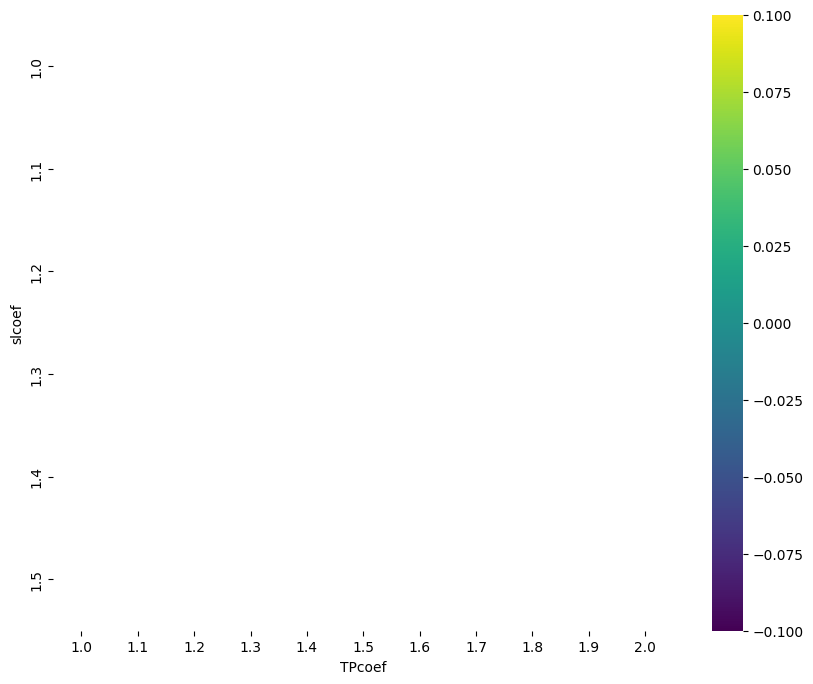

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()

In [52]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1568', ...)